In [4]:
import numpy as np
import numpy.random as ra
import matplotlib.pyplot as plt

In [24]:
# Simulating SDEs

def EulerMaruyama(sigma, mu, x0, dt=0.01, T=1):
    X = [x0]
    for _ in range(int(T / dt)):
        dB = ra.normal(scale=np.sqrt(dt))
        X.append(
            X[-1]
            + sigma(X[-1]) * dB
            + mu(X[-1]) * dt
        )
    return X

def Milstein(sigma, sigmaprime, mu, x0, dt=0.01, T=1):
    X = [x0]
    for _ in range(int(T/dt)):
        dB = ra.normal(scale=np.sqrt(dt))
        X.append(
            X[-1]
            + sigma(X[-1]) * dB
            + mu(X[-1]) * dt
            + 0.5 * sigmaprime(X[-1]) * sigma(X[-1]) * (dB**2 - dt)
        )
    return X

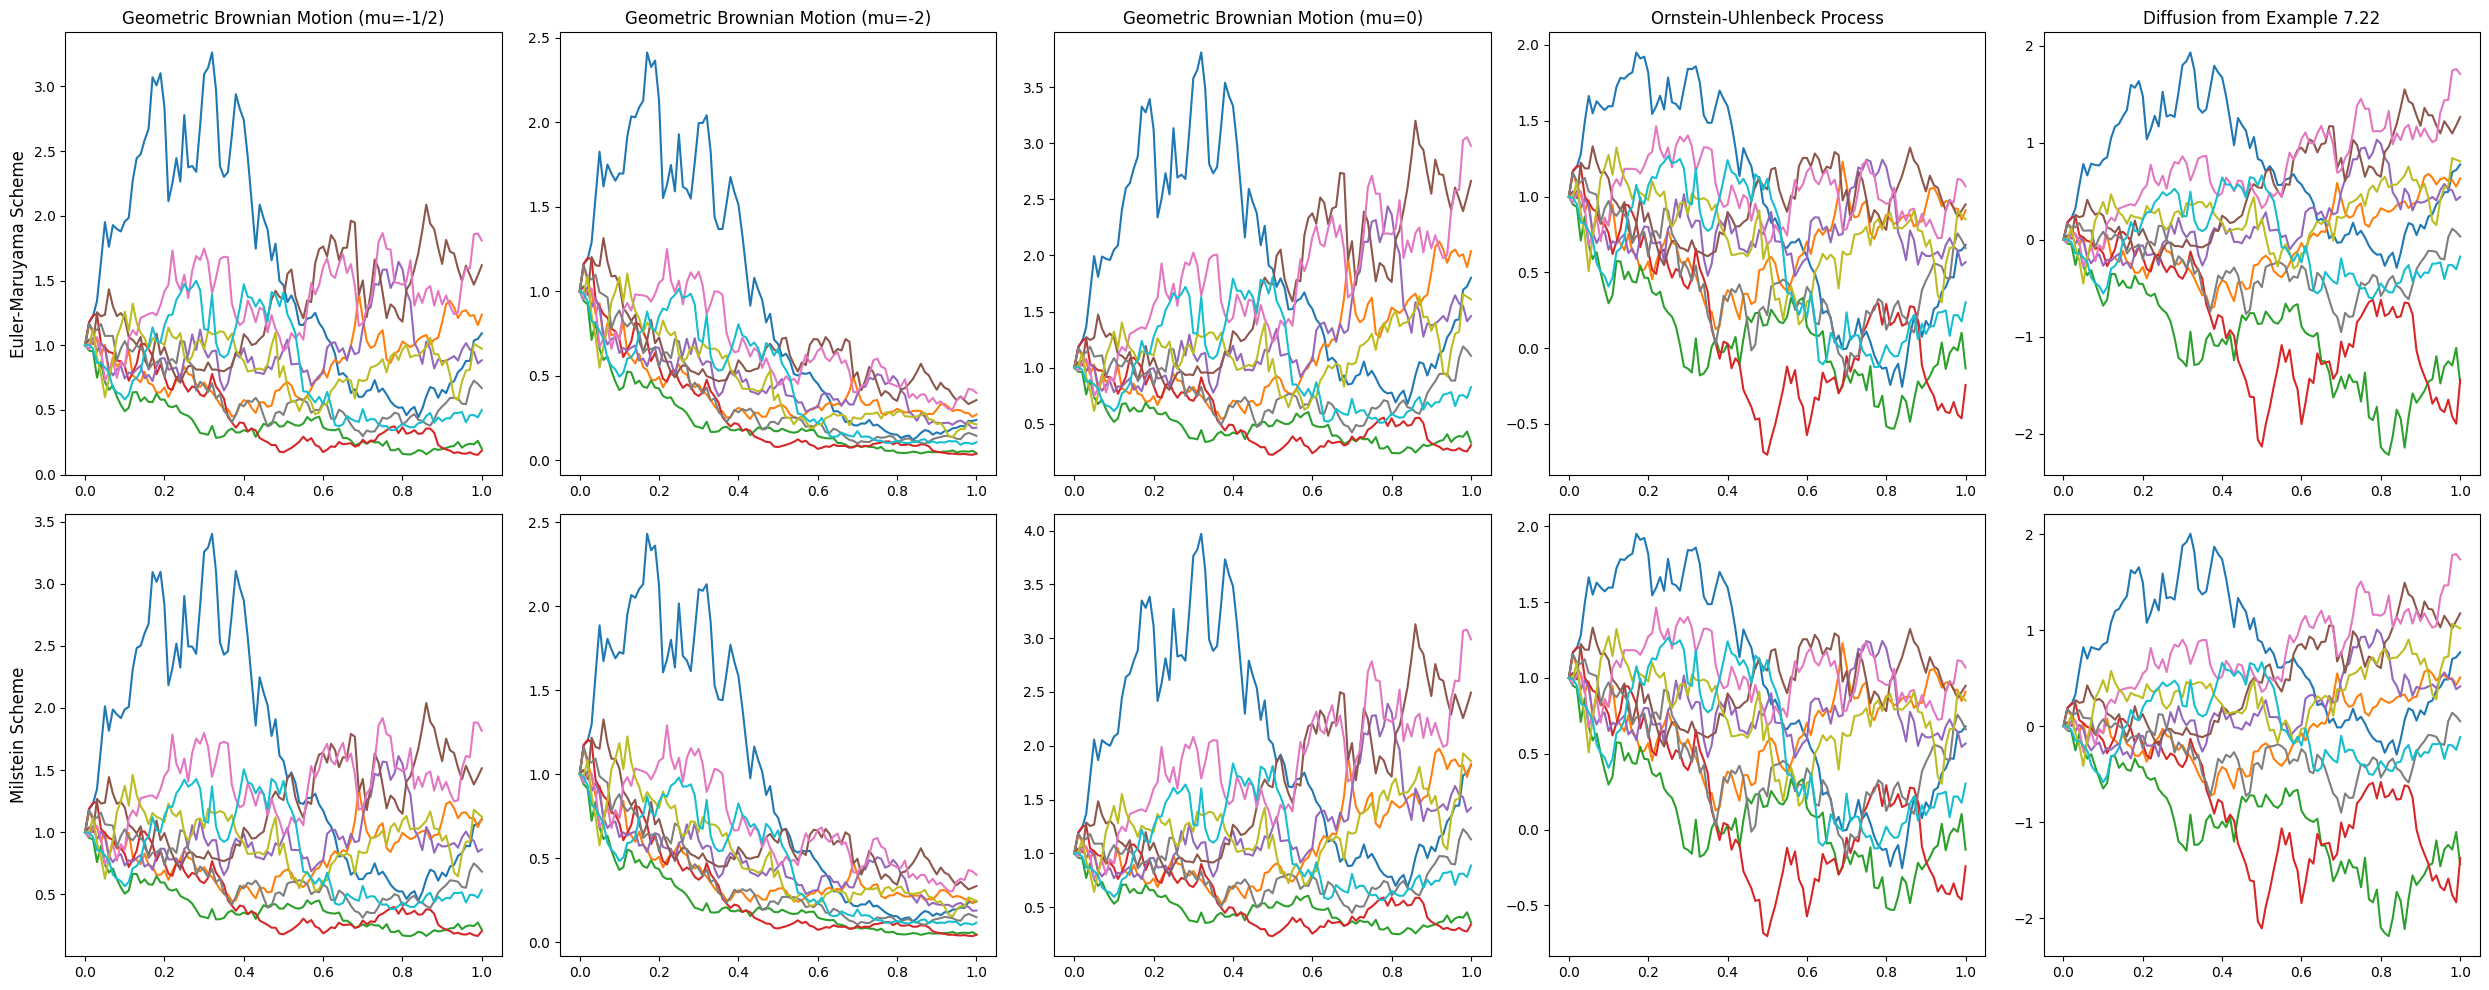

In [23]:
# Simulating SDEs

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25,10))

axes[0][0].set_title("Geometric Brownian Motion (mu=-1/2)")
axes[0][1].set_title("Geometric Brownian Motion (mu=-2)")
axes[0][2].set_title("Geometric Brownian Motion (mu=0)")
axes[0][3].set_title("Ornstein-Uhlenbeck Process")
axes[0][4].set_title("Diffusion from Example 7.22")
axes[:,0][0].set_ylabel("Euler-Maruyama Scheme", size='large')
axes[:,0][1].set_ylabel("Milstein Scheme", size='large')

time = np.array([i * 0.01 for i in range(int(1/0.01) + 1)])

for s in range(10):
    plt.subplot(2,5,1)
    ra.seed(s)
    plt.plot(time, EulerMaruyama(lambda x : x, lambda x : (-1/2 + 1/2) * x, x0=1))

    plt.subplot(2,5,2)
    ra.seed(s)
    plt.plot(time, EulerMaruyama(lambda x : x, lambda x : (-2 + 1/2) * x, x0=1))

    plt.subplot(2,5,3)
    ra.seed(s)
    plt.plot(time, EulerMaruyama(lambda x : x, lambda x : (0 + 1/2) * x, x0=1))

    plt.subplot(2,5,4)
    ra.seed(s)
    plt.plot(time, EulerMaruyama(lambda x : 1, lambda x : -x, x0=1))

    plt.subplot(2,5,5)
    ra.seed(s)
    plt.plot(time, EulerMaruyama(lambda x : np.sqrt(1+x**2), lambda x : np.sin(x), x0=0))

    plt.subplot(2,5,6)
    ra.seed(s)
    plt.plot(time, Milstein(lambda x : x, lambda x : 1, lambda x : (-1/2 + 1/2) * x, x0=1))

    plt.subplot(2,5,7)
    ra.seed(s)
    plt.plot(time, Milstein(lambda x : x, lambda x : 1, lambda x : (-2 + 1/2) * x, x0=1))

    plt.subplot(2,5,8)
    ra.seed(s)
    plt.plot(time, Milstein(lambda x : x, lambda x : 1, lambda x : (0 + 1/2) * x, x0=1))

    plt.subplot(2,5,9)
    ra.seed(s)
    plt.plot(time, Milstein(lambda x : 1, lambda x : 0, lambda x : -x, x0=1))

    plt.subplot(2,5,10)
    ra.seed(s)
    plt.plot(time, Milstein(lambda x : np.sqrt(1+x**2), lambda x : 1 / np.sqrt(1+x**2), lambda x : np.sin(x), x0=0))

fig.tight_layout()
plt.show()

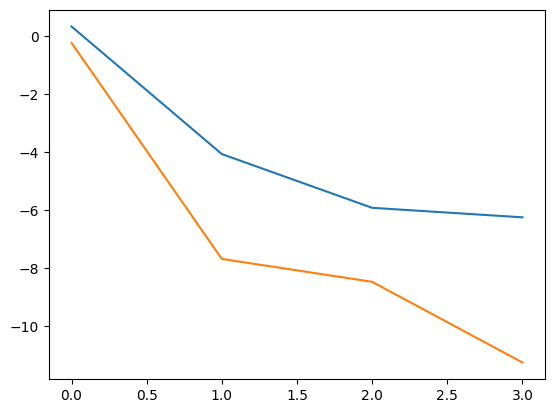

In [33]:
# Euler vs Milstein

euler_errors = []
milstein_errors = []

for n in [10, 100, 1000, 10000]:
    euler_error = 0
    milstein_error = 0

    for _ in range(100):
        ra.seed(0)
        truth = np.exp(EulerMaruyama(lambda x : 1, lambda x : 0, 0, dt=1/n)[-1])

        ra.seed(0)
        euler = EulerMaruyama(lambda x : x, lambda x : 0.5 * x, x0=1, dt=1/n)[-1]

        ra.seed(0)
        milstein = Milstein(lambda x : x, lambda x : 1, lambda x : 0.5 * x, x0=1, dt=1/n)[-1]

        euler_error += np.abs(truth-euler)
        milstein_error += np.abs(truth-milstein)

    euler_error = euler_error / 100
    milstein_error = milstein_error / 100

    euler_errors.append(np.log(euler_error))
    milstein_errors.append(np.log(milstein_error))

plt.plot(euler_errors)
plt.plot(milstein_errors)
plt.show()

In [43]:
# CIR Model

def CIR(alpha, dt=0.001, T=1):
    Z = [1]

    negative = False

    for _ in range(int(T/dt)):
        if Z[-1] >= 0 and not negative:
            dB = ra.normal(scale=np.sqrt(dt))
            Z.append(
                Z[-1]
                + np.sqrt(Z[-1]) * dB
                + (alpha - Z[-1]) * dt
                + 0.5 * 0.5 * (dB**2 - dt)
            )
        else:
            Z.append(0)
            negative = True
            
    return Z, negative

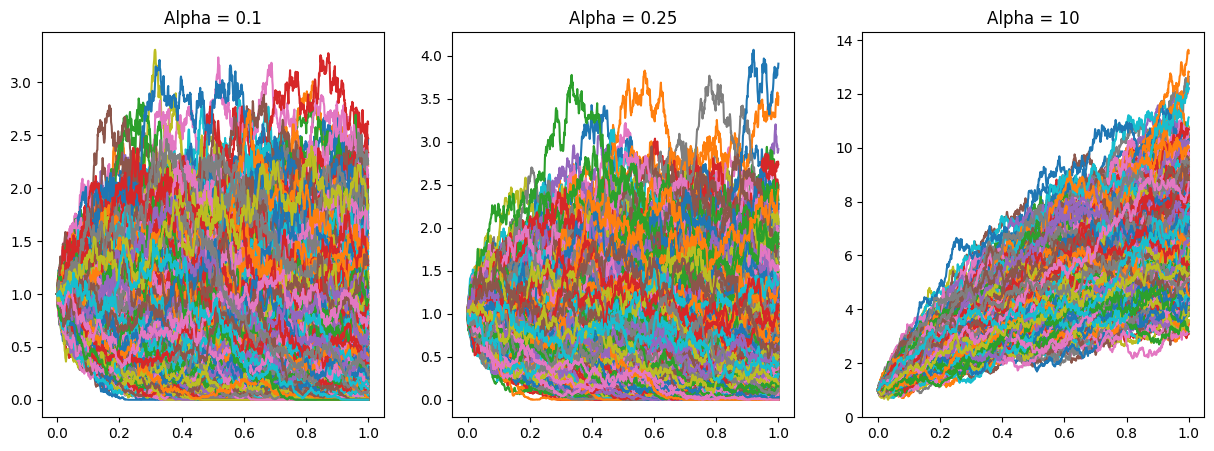

[215, 54, 0]


In [49]:
# CIR Model

time = np.array([i * 0.001 for i in range(int(1/0.001)+1)])

plt.figure(figsize=(15,5))

negatives = [0,0,0]

for _ in range(1000):
    plt.subplot(1,3,1)
    plt.title("Alpha = 0.1")
    Z, n = CIR(0.1)
    plt.plot(time, Z) 
    if n:
        negatives[0] += 1

    plt.subplot(1,3,2)
    plt.title("Alpha = 0.25")
    Z, n = CIR(0.25)
    plt.plot(time, Z)
    if n:
        negatives[1] += 1

    plt.subplot(1,3,3)
    plt.title("Alpha = 10")
    Z, n = CIR(10)
    plt.plot(time, Z)
    if n:
        negatives[2] += 1

plt.show()
print(negatives)

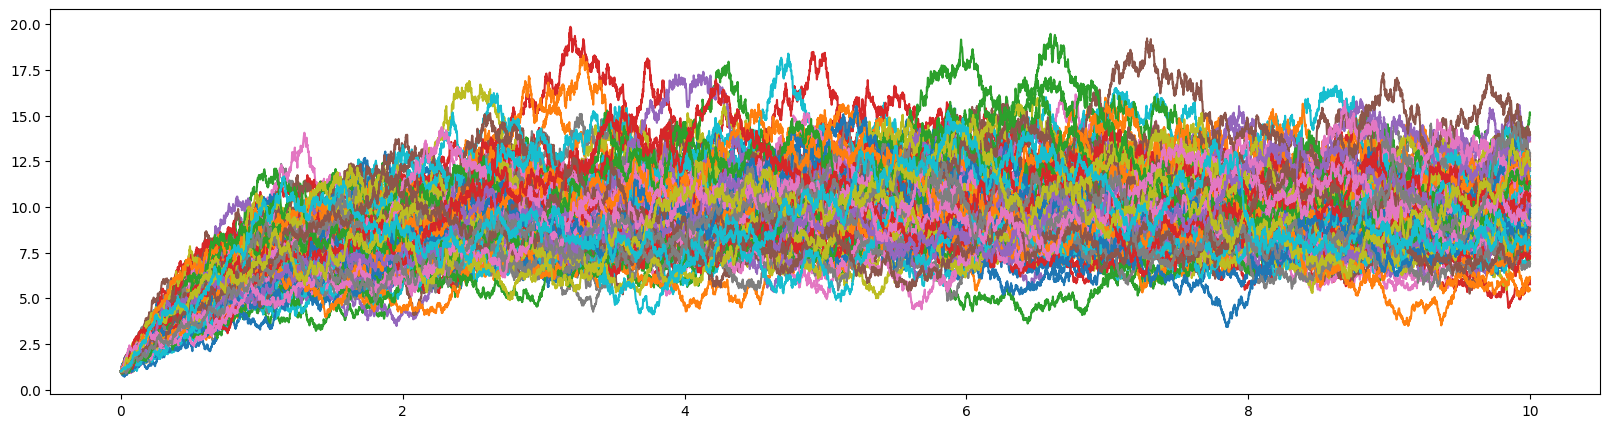

Average of Z_10 = 9.945916446635147


In [51]:
# CIR Model

time = np.array([i * 0.001 for i in range(int(10/0.001)+1)])
plt.figure(figsize=(20,5))

sum = 0

for _ in range(100):
    Z, _ = CIR(10, T=10)
    plt.plot(time, Z)
    sum += Z[-1]
    
avg = sum / 100
plt.show()
print(f"Average of Z_10 = {avg}")

In [52]:
# Bessel Process

def Bessel(d, dt=0.001, T=1):
    R = [1]
    neg = False
    for _ in range(int(T / dt)):
        if R[-1] >= 0 and not neg:
            dB = ra.normal(scale=np.sqrt(dt))
            R.append(R[-1] + dB + (d-1)/(2*R[-1]) * dt)
        else:
            R.append(0)
            neg = True
    return R, neg

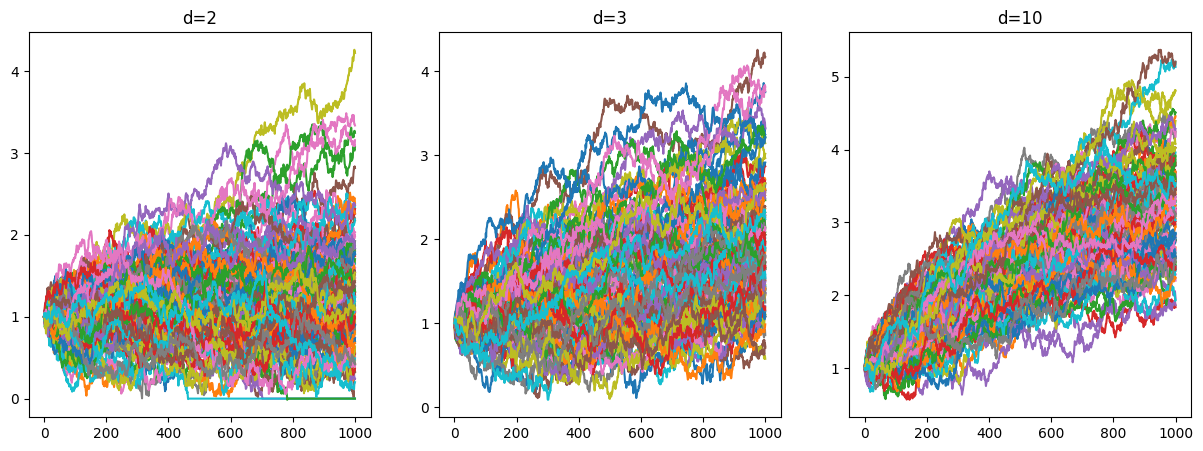

[3, 0, 0]


In [56]:
# Bessel Process

plt.figure(figsize=(15,5))

negatives = [0,0,0]

for _ in range(100):
    plt.subplot(1,3,1)
    plt.title("d=2")
    R, n = Bessel(2)
    plt.plot(R)
    if n:
        negatives[0] += 1

    plt.subplot(1,3,2)
    plt.title("d=3")
    R, n = Bessel(3)
    plt.plot(R)
    if n:
        negatives[1] += 1

    plt.subplot(1,3,3)
    plt.title("d=10")
    R, n = Bessel(10)
    plt.plot(R)
    if n:
        negatives[2] += 1

plt.show()
print(negatives)

/tmp/ipykernel_9537/2901356675.py:4: RuntimeWarning: overflow encountered in exp
  plt.plot(EulerMaruyama(lambda x : np.exp(x), lambda x : 0, 0))


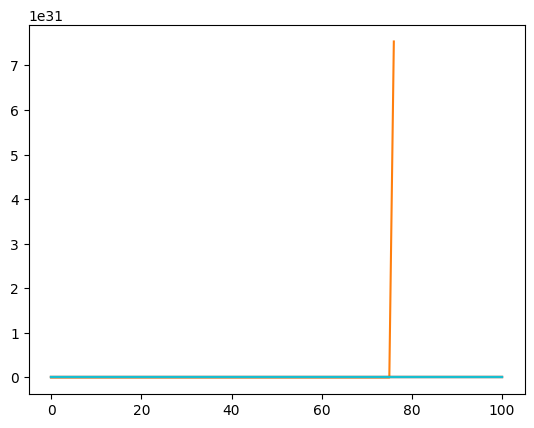

In [69]:
# Explosion time

for _ in range(10):
    plt.plot(EulerMaruyama(lambda x : np.exp(x), lambda x : 0, 0))

plt.show()

In [70]:
# A martingale

def BrownianMotion(stepsize=0.001, time=1):
    return np.concatenate(([0], np.cumsum(ra.normal(scale=np.sqrt(stepsize), size=int(time/stepsize)))))

def ItoIntegral(f, B, stepsize=0.001):
    increments = [0] + [f(i * stepsize, B[i]) * (B[i+1] - B[i]) for i in range(len(B)-1)]
    return np.cumsum(increments)

def Integral(f, B, stepsize=0.001):
    increments = [0] + [f(i * stepsize, B[i]) * stepsize for i in range(len(B)-1)]
    return np.cumsum(increments)

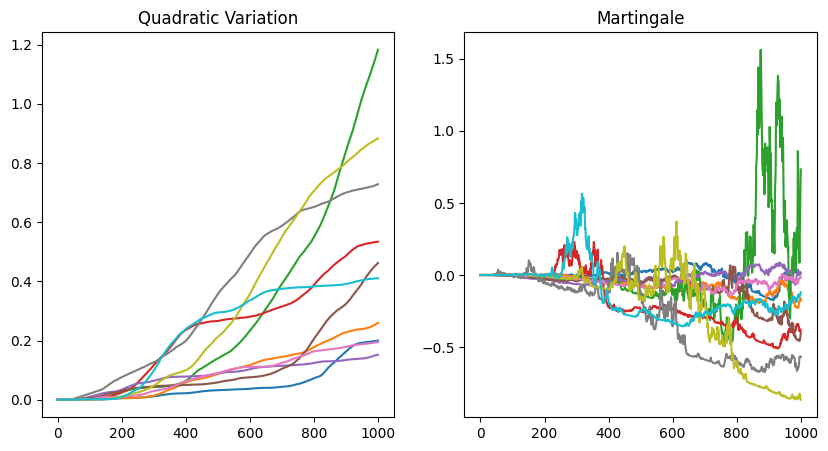

In [72]:
# A martingale

plt.figure(figsize=(10,5))

time = np.array([i * 0.001 for i in range(int(1/0.001)+1)])

for _ in range(10):
    B = BrownianMotion()
    Q = Integral(lambda t, x : x**2, B)
    X = ItoIntegral(lambda t, x : x, B)

    plt.subplot(1,2,1)
    plt.title("Quadratic Variation")
    plt.plot(Q)

    plt.subplot(1,2,2)
    plt.title("Martingale")
    plt.plot(X**2-Q)

plt.show()